In [1]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import logging

logging.set_verbosity_error()  # suppress untrained weight error (unconsequential)

# use BERT base uncased model
# https://huggingface.co/bert-base-uncased
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=1)

In [2]:
import matplotlib.pyplot as plt
import numpy as np


def show_predictions(predictions):
    percentage_0 = (np.count_nonzero(predictions == 0) / len(predictions)) * 100
    percentage_1 = (np.count_nonzero(predictions == 1) / len(predictions)) * 100

    labels = ["0", "1"]
    percentages = [percentage_0, percentage_1]

    plt.bar(labels, percentages, color=["red", "blue"])
    plt.xlabel("Predictions")
    plt.ylabel("Percentage")

    plt.show()

In [3]:
def eval(model, texts):
    model.eval()

    inputs = tokenizer(
        [text for text in texts],
        return_tensors="pt",
        truncation=True,
        padding=True,
    )
    input_ids = inputs["input_ids"]
    attention_mask = inputs["attention_mask"]

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    probabilities = torch.sigmoid(outputs.logits).cpu().numpy()
    predicted_labels = (probabilities > 0.5).astype(int).flatten()

    return predicted_labels

In [4]:
import torch


try:
    model.load_state_dict(torch.load("bill_hardy.pt"))
except:
    print(
        "Model not found; please train it using `2_BERT_binary_classification_bill.ipynb`"
    )
    raise

Generate datasets:
* Corpus 1: texts from narrators other than Bill Hardy and converted into the present tense
* Corpus 2: texts from Bill Hardy and converted into the past sense

In [5]:
# the first corpus contains texts belonging to narrators other than Bill Hardy and
# that have been transformed to use the present tense instead of the past tense
corpus_1 = [
    "I plunge for the last time. The few remaining figures and letters swim as they come up to me. Then I take them in. There are no more. I glance about me. I feel I am getting my money’s worth. London is like that; it accepts the wanderer home with a sort of warm indifference. The woman’s beauty is, I surmise, profound; her creamy dress, contrasting with her vivid colouring, shows to me, though more as white against a gay brick sepulchre than snow against roses. Yes it is a dreadful beauty, as far as I can see, and I recall the stark phrases: Which swept an hundred thousand souls away; yet I alive. But he was not; the writer had strangely died today. And again they continued this wretched course three or four days: but they were every one of them carried into the great pit before it was quite filled up. Where is Henry? Ah, he is standing by her, close enough to touch the small buoyant face that topped her pillared neck most like a bell-flower on its bed. Would he appreciate?",
    "Of course I am sorry to say good-bye to old Medehamstede; but it is pleasant to sit down and to really find myself alone at last. Those emotional times were trying to us all. I feel that my lips are paler than I like; but a touch of Pasquier’s claret soon puts me right. Dear old Pasquier, I have come across him in Paris, at that little place in the Rue de la Harpe, a street in which, I have been told, there was a touch of orderly room even in the disorderly houses. I open a magazine and look hastily through the last paragraphs of the short stories. I am all for love; but fading out on an embrace never appealed to me. The embrace in my short stories—and my life is all short stories, I have come to think—occurs in the first few words. And afterwards the plot. The complete novel length looks better. It is called Savage Conqueror, and I like that."
]

In [6]:
predicted_labels = eval(model, corpus_1)
print(predicted_labels)

[1 1]


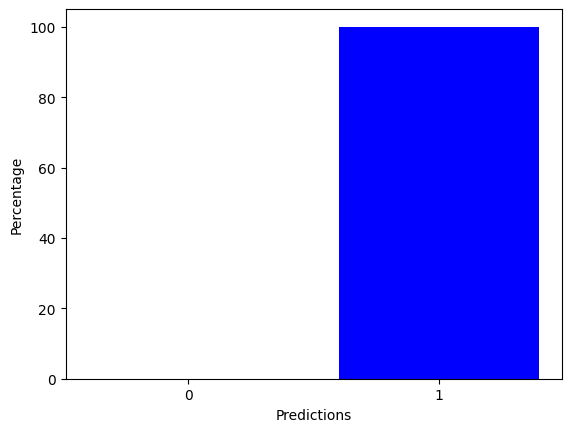

In [7]:
show_predictions(predicted_labels)